In [1]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt

 # Read & Clean Data

In [2]:
natl = pd.read_excel('nationwide-encounters-fy20-fy23-mar.xlsx')

In [3]:
natl.head()

,Fiscal Year,Month Grouping,Month (abbv),Date,Component,Land Border Region,Area of Responsibility,AOR (Abbv),State,State_Name,Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
0,2020,FYTD,DEC,DEC 2020,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,ME,Maine,FMUA,OTHER,Title 8,Inadmissibles,5
1,2020,FYTD,DEC,DEC 2020,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,ME,Maine,Single Adults,CANADA,Title 8,Inadmissibles,722
2,2020,FYTD,DEC,DEC 2020,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,ME,Maine,Single Adults,INDIA,Title 8,Inadmissibles,2
3,2020,FYTD,DEC,DEC 2020,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,ME,Maine,Single Adults,OTHER,Title 8,Inadmissibles,57
4,2020,FYTD,DEC,DEC 2020,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,ME,Maine,Single Adults,PHILIPPINES,Title 8,Inadmissibles,5


In [4]:
natl.tail()

,Fiscal Year,Month Grouping,Month (abbv),Date,Component,Land Border Region,Area of Responsibility,AOR (Abbv),State,State_Name,Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
54937,2023 (FYTD),FYTD,OCT,OCT 2023 (FYTD),U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,AZ,Arizona,UC / Single Minors,VENEZUELA,Title 8,Apprehensions,11
54938,2023 (FYTD),FYTD,OCT,OCT 2023 (FYTD),U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,CA,California,Single Adults,GUATEMALA,Title 8,Apprehensions,9
54939,2023 (FYTD),FYTD,OCT,OCT 2023 (FYTD),U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,CA,California,Single Adults,MEXICO,Title 8,Apprehensions,17
54940,2023 (FYTD),FYTD,OCT,OCT 2023 (FYTD),U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,CA,California,UC / Single Minors,GUATEMALA,Title 8,Apprehensions,2
54941,2023 (FYTD),FYTD,OCT,OCT 2023 (FYTD),U.S. Border Patrol,Southwest Land Border,Yuma Sector,YUM,CA,California,UC / Single Minors,MEXICO,Title 8,Apprehensions,3


In [5]:
natl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54942 entries, 0 to 54941
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Fiscal Year             54942 non-null  object
 1   Month Grouping          54942 non-null  object
 2   Month (abbv)            54942 non-null  object
 3   Date                    54942 non-null  object
 4   Component               54942 non-null  object
 5   Land Border Region      54942 non-null  object
 6   Area of Responsibility  54942 non-null  object
 7   AOR (Abbv)              54942 non-null  object
 8   State                   54942 non-null  object
 9   State_Name              51851 non-null  object
 10  Demographic             54942 non-null  object
 11  Citizenship             54942 non-null  object
 12  Title of Authority      54942 non-null  object
 13  Encounter Type          54942 non-null  object
 14  Encounter Count         54942 non-null  int64 
dtypes:

 # Rename columns due to spacing

In [6]:
natl = natl.rename(columns = {"Fiscal Year" : "Fiscal_Year", "Month Grouping" : "Month_Grouping", "Land Border Region":"Land_Border_Region", "Area of Responsibility":"Area_of_Responsibility", "Title of Authority":"Title_of_Authority","Encounter Type":"Encounter_Type", "Encounter Count":"Encounter_Count"})

In [7]:
natl.columns

Index(['Fiscal_Year', 'Month_Grouping', 'Month (abbv)', 'Date', 'Component',
       'Land_Border_Region', 'Area_of_Responsibility', 'AOR (Abbv)', 'State',
       'State_Name', 'Demographic', 'Citizenship', 'Title_of_Authority',
       'Encounter_Type', 'Encounter_Count'],
      dtype='object')

In [8]:
natl.Land_Border_Region.unique()

array(['Northern Land Border', 'Other', 'Southwest Land Border'],
      dtype=object)

In [9]:
natl = natl[natl['Land_Border_Region'].isin(['Southwest Land Border'])]

In [10]:
natl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25377 entries, 29565 to 54941
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Fiscal_Year             25377 non-null  object
 1   Month_Grouping          25377 non-null  object
 2   Month (abbv)            25377 non-null  object
 3   Date                    25377 non-null  object
 4   Component               25377 non-null  object
 5   Land_Border_Region      25377 non-null  object
 6   Area_of_Responsibility  25377 non-null  object
 7   AOR (Abbv)              25377 non-null  object
 8   State                   25377 non-null  object
 9   State_Name              25377 non-null  object
 10  Demographic             25377 non-null  object
 11  Citizenship             25377 non-null  object
 12  Title_of_Authority      25377 non-null  object
 13  Encounter_Type          25377 non-null  object
 14  Encounter_Count         25377 non-null  int64 
dty

In [11]:
natl.Component.unique()

array(['Office of Field Operations', 'U.S. Border Patrol'], dtype=object)

In [12]:
natl=natl[natl['Component'].isin(['U.S. Border Patrol'])]

In [13]:
natl.Component.unique()

array(['U.S. Border Patrol'], dtype=object)

In [14]:
natl.Land_Border_Region.unique()

array(['Southwest Land Border'], dtype=object)

In [15]:
natl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18889 entries, 29694 to 54941
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Fiscal_Year             18889 non-null  object
 1   Month_Grouping          18889 non-null  object
 2   Month (abbv)            18889 non-null  object
 3   Date                    18889 non-null  object
 4   Component               18889 non-null  object
 5   Land_Border_Region      18889 non-null  object
 6   Area_of_Responsibility  18889 non-null  object
 7   AOR (Abbv)              18889 non-null  object
 8   State                   18889 non-null  object
 9   State_Name              18889 non-null  object
 10  Demographic             18889 non-null  object
 11  Citizenship             18889 non-null  object
 12  Title_of_Authority      18889 non-null  object
 13  Encounter_Type          18889 non-null  object
 14  Encounter_Count         18889 non-null  int64 
dty

In [16]:
pivot_i = pd.pivot_table(natl, index='Fiscal_Year', values='Encounter_Count', aggfunc=sum) #, columns=['Border'])
pivot_i


,Encounter_Count
Fiscal_Year,
2020,400651
2021,1659206
2022,2206436
2023 (FYTD),1055320


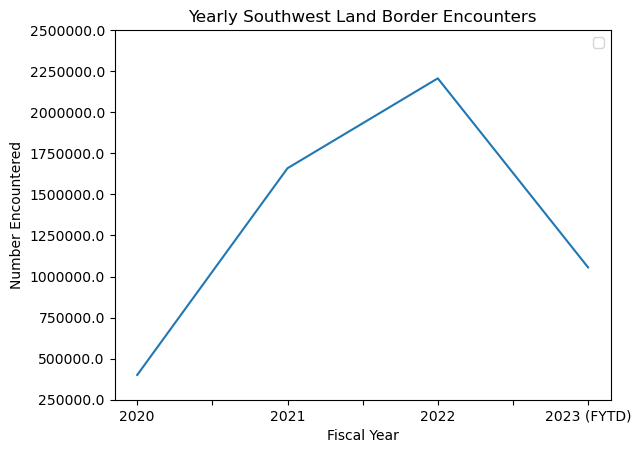

In [17]:
pivot_i.plot( kind = 'line')
plt.ylabel('Number Encountered')
plt.xlabel('Fiscal Year')
plt.title('Yearly Southwest Land Border Encounters')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0])
plt.legend('')
plt.savefig("YearlySouthBorder.png",bbox_inches='tight')
plt.show()

In [18]:
pivot_k = pd.pivot_table(natl, index='Area_of_Responsibility', values='Encounter_Count', aggfunc=sum) #, columns=['Border'])
pivot_k


,Encounter_Count
Area_of_Responsibility,
Big Bend Sector,85112
Del Rio Sector,998416
El Centro Sector,195706
El Paso Sector,821195
Laredo Sector,296650
Rio Grande Valley Sector,1239575
San Diego Sector,481305
Tucson Sector,655593
Yuma Sector,548061


In [19]:
sorted_k = pivot_k.sort_values(by='Encounter_Count', ascending=False)
sorted_k

,Encounter_Count
Area_of_Responsibility,
Rio Grande Valley Sector,1239575
Del Rio Sector,998416
El Paso Sector,821195
Tucson Sector,655593
Yuma Sector,548061
San Diego Sector,481305
Laredo Sector,296650
El Centro Sector,195706
Big Bend Sector,85112


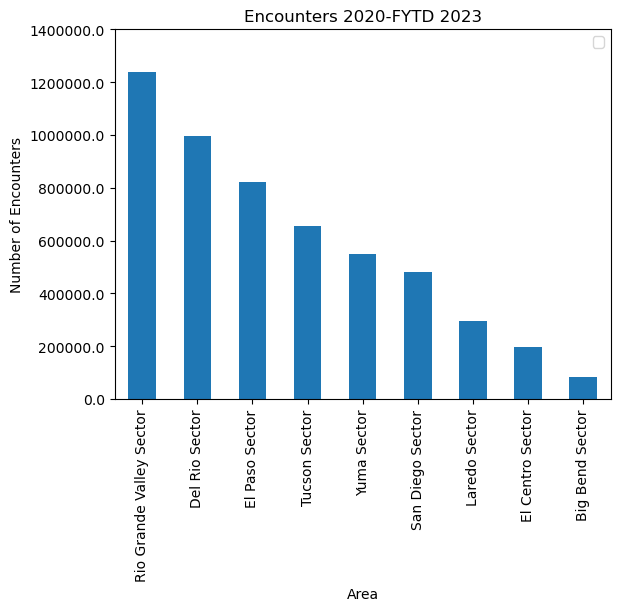

In [20]:
            #fix y axis values

sorted_k.plot( kind = 'bar')
plt.ylabel('Number of Encounters')
plt.xlabel('Area')
plt.title('Encounters 2020-FYTD 2023')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0])
plt.legend('')
plt.savefig("AreaSouthBorder.png",bbox_inches='tight')
plt.show()

In [21]:
pivot_l = pd.pivot_table(natl, index=['Fiscal_Year','Title_of_Authority', 'Encounter_Type'], values='Encounter_Count', aggfunc=sum) #, columns=['Border'])
pivot_l


Encounter_Count
Fiscal_Year Title_of_Authority Encounter_Type                 
2020        Title 42           Expulsions               197043
            Title 8            Apprehensions            203608
2021        Title 42           Expulsions              1040220
            Title 8            Apprehensions            618986
2022        Title 42           Expulsions              1054084
            Title 8            Apprehensions           1152352
2023 (FYTD) Title 42           Expulsions               419147
            Title 8            Apprehensions            636173

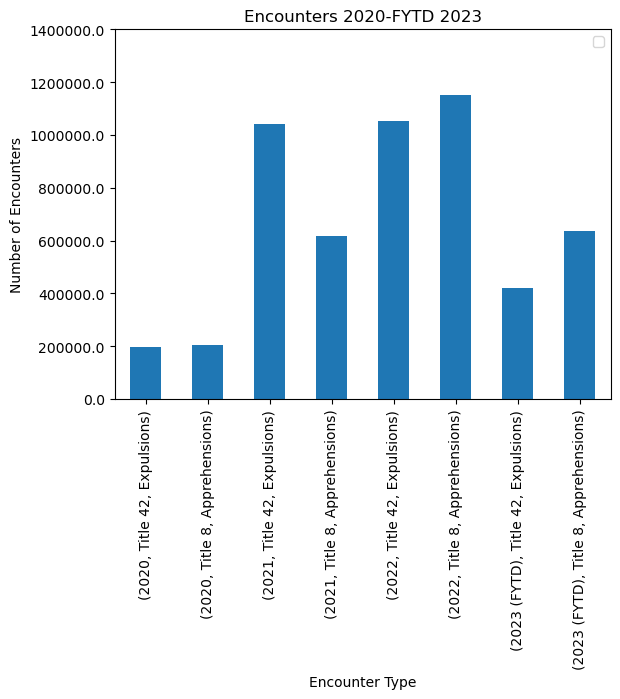

In [22]:
pivot_l.plot( kind = 'bar')
plt.ylabel('Number of Encounters')
plt.xlabel('Encounter Type')
plt.title('Encounters 2020-FYTD 2023')
plt.legend('')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0])
#yaxis.set_major_formatter(y_format) 
plt.savefig("EncounterTypes.png",bbox_inches='tight')
plt.show()